In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('IPL_Matches_2022.csv')
pd.set_option('display.max_columns',None)

In [3]:
df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1304051,Pune,2022-03-29,2022,5,Rajasthan Royals,Sunrisers Hyderabad,"Maharashtra Cricket Association Stadium, Pune",Sunrisers Hyderabad,field,N,Rajasthan Royals,Runs,61,NaN,SV Samson,"['JC Buttler', 'YBK Jaiswal', 'SV Samson', 'D ...","['KS Williamson', 'Abhishek Sharma', 'RA Tripa...",BNJ Oxenford,UV Gandhe
70,1304050,Mumbai,2022-03-28,2022,4,Lucknow Super Giants,Gujarat Titans,"Wankhede Stadium, Mumbai",Gujarat Titans,field,N,Gujarat Titans,Wickets,5,NaN,Mohammed Shami,"['KL Rahul', 'Q de Kock', 'E Lewis', 'MK Pande...","['Shubman Gill', 'MS Wade', 'V Shankar', 'HH P...",PG Pathak,VK Sharma
71,1304049,Mumbai,2022-03-27,2022,3,Royal Challengers Bangalore,Punjab Kings,"Dr DY Patil Sports Academy, Mumbai",Punjab Kings,field,N,Punjab Kings,Wickets,5,NaN,OF Smith,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'KD ...","['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...",Nitin Menon,YC Barde
72,1304048,Mumbai,2022-03-27,2022,2,Mumbai Indians,Delhi Capitals,"Brabourne Stadium, Mumbai",Delhi Capitals,field,N,Delhi Capitals,Wickets,4,NaN,Kuldeep Yadav,"['RG Sharma', 'Ishan Kishan', 'Anmolpreet Sing...","['PP Shaw', 'TL Seifert', 'Mandeep Singh', 'RR...",RJ Tucker,HAS Khalid


In [4]:
#Here is a column-wise explanation of the dataset:

# ID – A unique identifier for each match.
# City – The city where the match was played.
# Date – The date on which the match was held.
# Season – The IPL season (e.g., 2022).
# MatchNumber – The match's sequence in the season (e.g., Final, Qualifier 1, 70).
# Team1 – The first team playing in the match.
# Team2 – The second team playing in the match.
# Venue – The stadium where the match was played.
# TossWinner – The team that won the toss.
# TossDecision – The decision made by the toss-winning team (bat or field).
#SuperOver – Indicates if a Super Over was played (Yes/No).
# WinningTeam – The team that won the match.
# WonBy – The type of win (Runs or Wickets).
# Margin – The margin of victory (number of runs or wickets).
# method – Any special method used to determine the result (e.g., DLS method), otherwise NaN.
# Player_of_Match – The player who was awarded "Man of the Match."
# Team1Players – List of players in Team 1.
# Team2Players – List of players in Team 2.
# Umpire1 – Name of the first umpire.
# Umpire2 – Name of the second umpire.

In [5]:
df.shape

(74, 20)

In [6]:
df.describe()

,ID,Season,Margin,method
count,7.400000e+01,74.0,74.000000,0.0
mean,1.304520e+06,2022.0,16.972973,NaN
std,1.848086e+03,0.0,19.651047,NaN
min,1.304047e+06,2022.0,2.000000,NaN
25%,1.304065e+06,2022.0,5.250000,NaN
50%,1.304084e+06,2022.0,8.000000,NaN
75%,1.304102e+06,2022.0,18.000000,NaN
max,1.312200e+06,2022.0,91.000000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               74 non-null     int64  
 1   City             74 non-null     object 
 2   Date             74 non-null     object 
 3   Season           74 non-null     int64  
 4   MatchNumber      74 non-null     object 
 5   Team1            74 non-null     object 
 6   Team2            74 non-null     object 
 7   Venue            74 non-null     object 
 8   TossWinner       74 non-null     object 
 9   TossDecision     74 non-null     object 
 10  SuperOver        74 non-null     object 
 11  WinningTeam      74 non-null     object 
 12  WonBy            74 non-null     object 
 13  Margin           74 non-null     int64  
 14  method           0 non-null      float64
 15  Player_of_Match  74 non-null     object 
 16  Team1Players     74 non-null     object 
 17  Team2Players     7

In [8]:
df.isnull().sum()

ID                  0
City                0
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
Venue               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
WonBy               0
Margin              0
method             74
Player_of_Match     0
Team1Players        0
Team2Players        0
Umpire1             0
Umpire2             0
dtype: int64

In [9]:
df.drop(columns=['method'],inplace=True)

In [10]:
df.shape

(74, 19)

In [11]:
df.isnull().sum()

ID                 0
City               0
Date               0
Season             0
MatchNumber        0
Team1              0
Team2              0
Venue              0
TossWinner         0
TossDecision       0
SuperOver          0
WinningTeam        0
WonBy              0
Margin             0
Player_of_Match    0
Team1Players       0
Team2Players       0
Umpire1            0
Umpire2            0
dtype: int64

In [12]:
df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'Player_of_Match', 'Team1Players', 'Team2Players',
       'Umpire1', 'Umpire2'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_12504\2728559819.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Margin'])


<Axes: xlabel='Margin', ylabel='Density'>

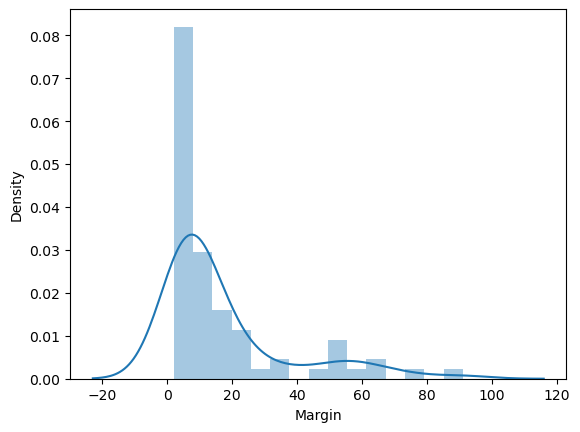

In [13]:
sns.distplot(df['Margin'])

<Axes: ylabel='Margin'>

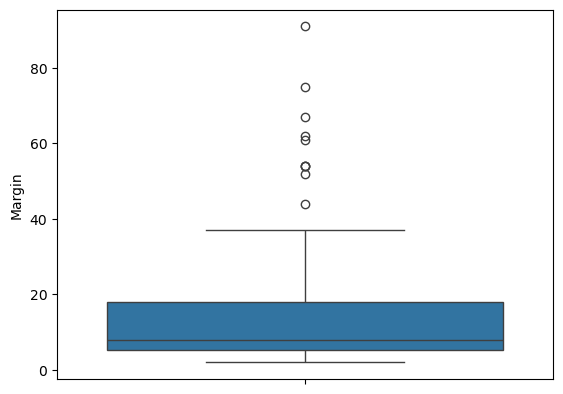

In [14]:
sns.boxplot(df['Margin'])

In [15]:
df['WinningTeam'].value_counts()

WinningTeam
Gujarat Titans                 12
Rajasthan Royals               10
Royal Challengers Bangalore     9
Lucknow Super Giants            9
Punjab Kings                    7
Delhi Capitals                  7
Sunrisers Hyderabad             6
Kolkata Knight Riders           6
Mumbai Indians                  4
Chennai Super Kings             4
Name: count, dtype: int64

In [16]:
df['WonBy'].value_counts()

WonBy
Wickets    37
Runs       37
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=le.fit_transform(df[i])

In [18]:
df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,0,61,2022,71,7,2,4,7,0,0,2,1,7,10,70,67,2,9
1,1312199,0,60,2022,73,8,7,4,7,1,0,7,1,7,13,60,71,2,9
2,1312198,1,59,2022,70,8,4,2,4,1,0,8,0,14,40,59,47,6,5
3,1312197,1,58,2022,72,7,2,2,2,1,0,2,1,7,4,71,66,1,15
4,1304116,2,57,2022,67,9,6,5,9,0,0,6,1,5,12,33,27,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1304051,4,3,2022,44,7,9,3,9,1,0,7,0,61,46,17,34,1,14
70,1304050,2,2,2022,33,4,2,5,2,1,0,2,1,5,27,21,58,13,15
71,1304049,2,1,2022,22,8,6,1,6,1,0,6,1,5,30,8,36,12,16
72,1304048,2,1,2022,11,5,1,0,1,1,0,1,1,4,21,50,44,15,2


C:\Users\hp\AppData\Local\Temp\ipykernel_12504\2855331353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["WonBy"], order=df["WonBy"].value_counts().index, palette="viridis")


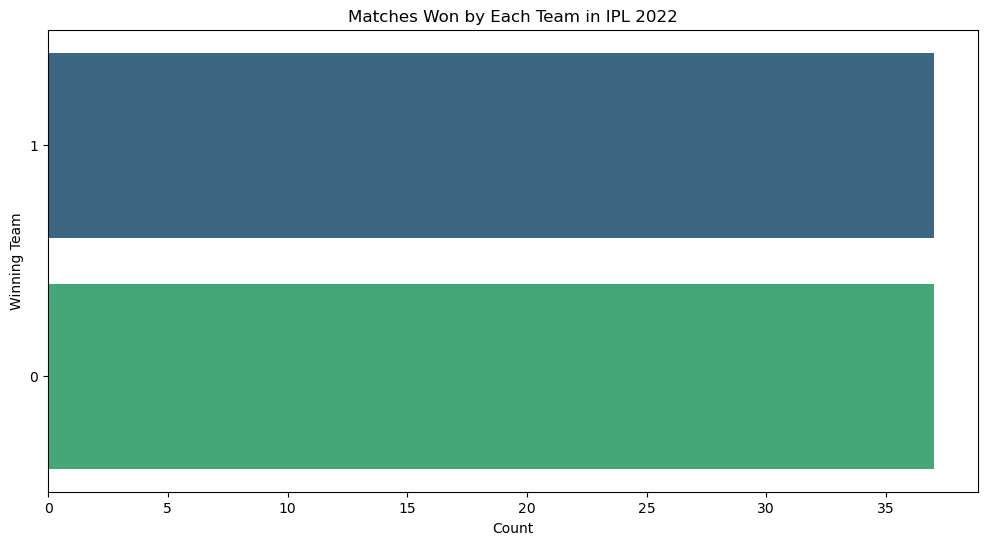

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(y=df["WonBy"], order=df["WonBy"].value_counts().index, palette="viridis")
plt.title("Matches Won by Each Team in IPL 2022")
plt.xlabel("Count")
plt.ylabel("Winning Team")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12504\2650813977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["WonBy"], y=df["Margin"], palette="coolwarm")


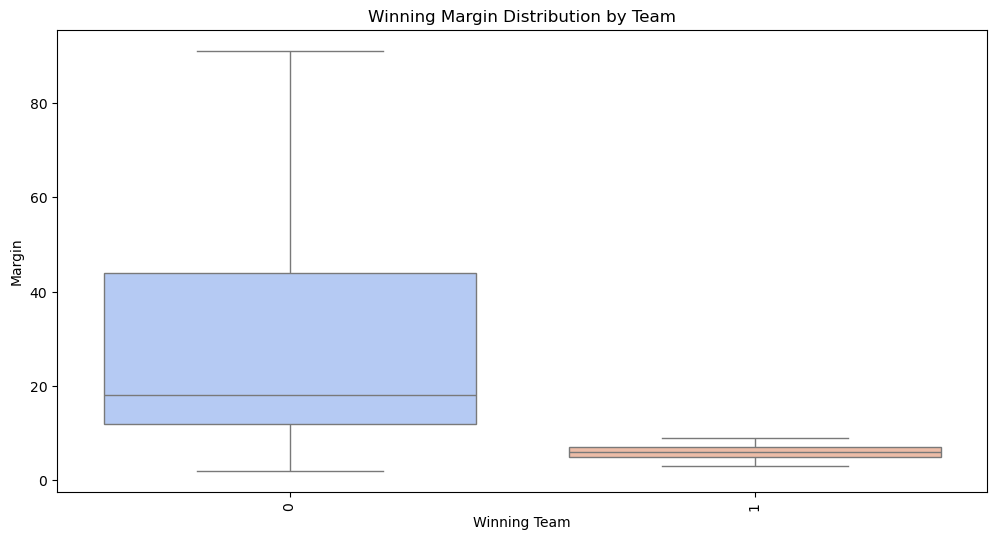

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["WonBy"], y=df["Margin"], palette="coolwarm")
plt.title("Winning Margin Distribution by Team")
plt.xlabel("Winning Team")
plt.ylabel("Margin")
plt.xticks(rotation=90)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12504\3058340457.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, bins=30, kde=True)


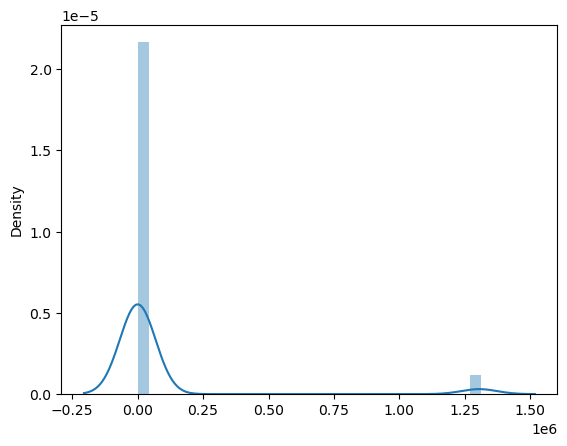

In [21]:
sns.distplot(df, bins=30, kde=True)
plt.show()

In [22]:
df.describe()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
count,7.400000e+01,74.000000,74.000000,74.0,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.0,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1.304520e+06,2.391892,29.797297,2022.0,36.500000,4.527027,4.594595,2.378378,4.472973,0.797297,0.0,4.635135,0.500000,16.972973,27.040541,34.959459,35.513514,5.716216,9.013514
std,1.848086e+03,0.903836,17.611469,0.0,21.505813,2.853611,2.904502,1.970347,2.957336,0.404757,0.0,2.787321,0.503413,19.651047,16.268668,20.896640,21.228853,5.040983,4.942112
min,1.304047e+06,0.000000,0.000000,2022.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.304065e+06,2.000000,15.000000,2022.0,18.250000,2.000000,2.000000,1.000000,2.000000,1.000000,0.0,2.000000,0.000000,5.250000,13.250000,16.250000,17.250000,1.000000,5.000000
50%,1.304084e+06,2.000000,29.500000,2022.0,36.500000,5.000000,4.000000,2.000000,4.000000,1.000000,0.0,4.000000,0.500000,8.000000,25.500000,34.500000,35.500000,4.000000,9.000000
75%,1.304102e+06,3.000000,43.750000,2022.0,54.750000,7.000000,7.000000,5.000000,7.000000,1.000000,0.0,7.000000,1.000000,18.000000,40.750000,52.750000,53.750000,10.000000,14.000000
max,1.312200e+06,4.000000,61.000000,2022.0,73.000000,9.000000,9.000000,5.000000,9.000000,1.000000,0.0,9.000000,1.000000,91.000000,55.000000,71.000000,71.000000,15.000000,16.000000


In [23]:
df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'Player_of_Match', 'Team1Players', 'Team2Players',
       'Umpire1', 'Umpire2'],
      dtype='object')

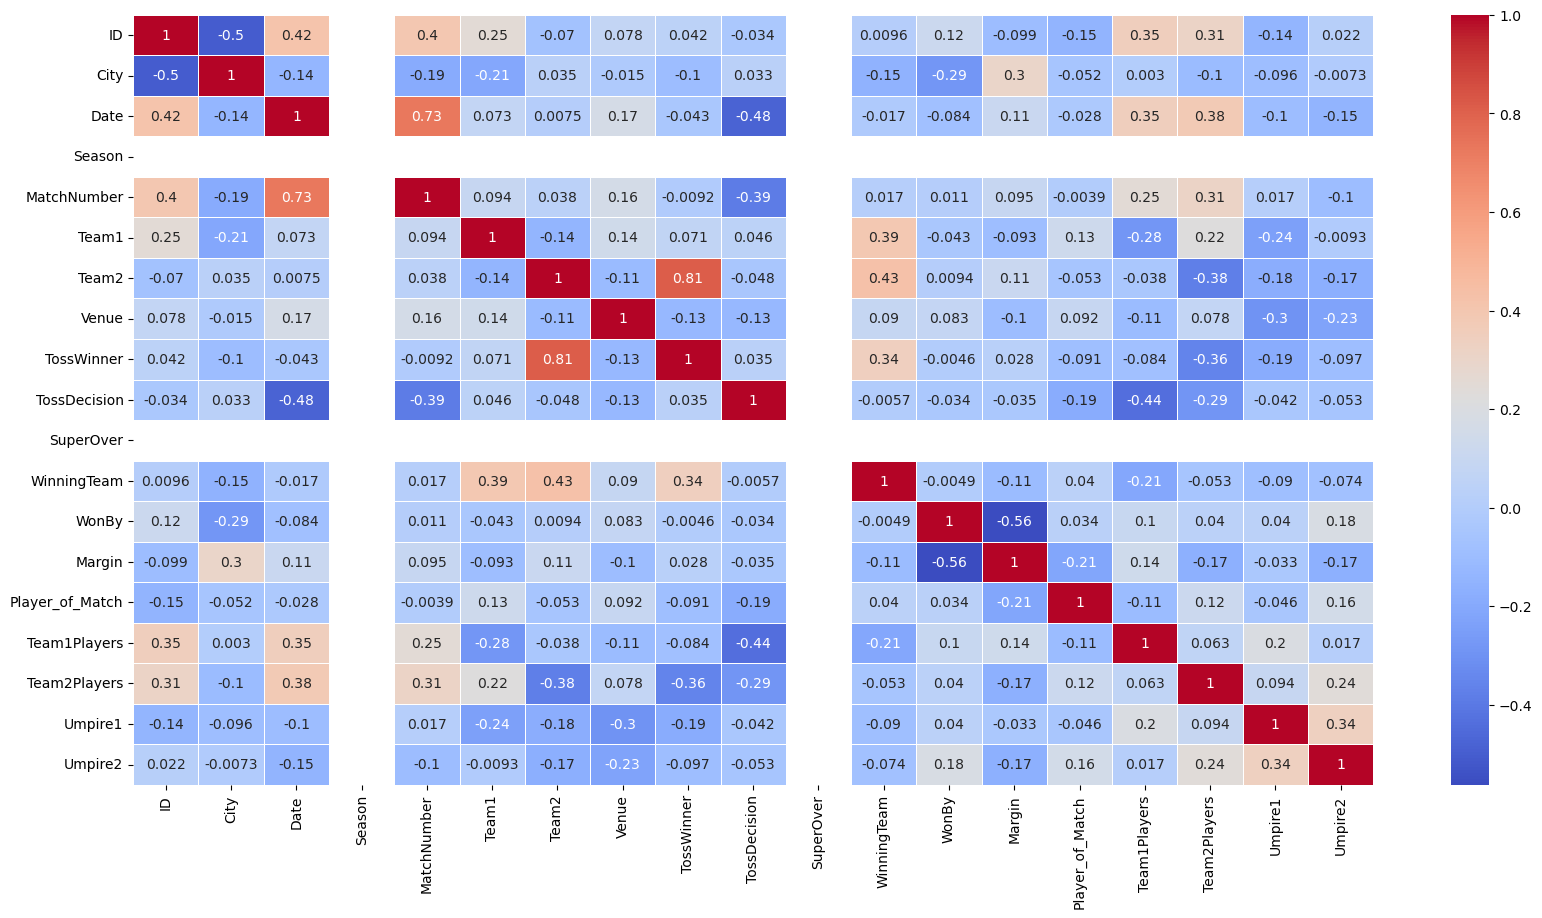

In [24]:
correlation=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, cmap ='coolwarm',linewidths=0.5)
plt.show()

In [25]:
x = df.drop(columns=["WonBy",])

In [26]:
x

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,0,61,2022,71,7,2,4,7,0,0,2,7,10,70,67,2,9
1,1312199,0,60,2022,73,8,7,4,7,1,0,7,7,13,60,71,2,9
2,1312198,1,59,2022,70,8,4,2,4,1,0,8,14,40,59,47,6,5
3,1312197,1,58,2022,72,7,2,2,2,1,0,2,7,4,71,66,1,15
4,1304116,2,57,2022,67,9,6,5,9,0,0,6,5,12,33,27,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1304051,4,3,2022,44,7,9,3,9,1,0,7,61,46,17,34,1,14
70,1304050,2,2,2022,33,4,2,5,2,1,0,2,5,27,21,58,13,15
71,1304049,2,1,2022,22,8,6,1,6,1,0,6,5,30,8,36,12,16
72,1304048,2,1,2022,11,5,1,0,1,1,0,1,4,21,50,44,15,2


In [27]:
y = df["WonBy"]

In [28]:
y

0     1
1     1
2     0
3     1
4     1
     ..
69    0
70    1
71    1
72    1
73    1
Name: WonBy, Length: 74, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
sc=scaler.fit_transform(df)

In [30]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [31]:
reg.fit(x_train,y_train)

C:\Users\hp\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred = reg.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, y_pred)

0.782608695652174

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
reg = RandomForestClassifier(n_estimators=100, random_state=42)
reg.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred = reg.predict(x_test)

In [38]:
accuracy_score(y_test, y_pred)

0.8695652173913043

In [39]:
o= reg.predict(x_train)
o

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0])

In [40]:
accuracy_score(o, y_train)*100

100.0

In [41]:
from sklearn.metrics import confusion_matrix

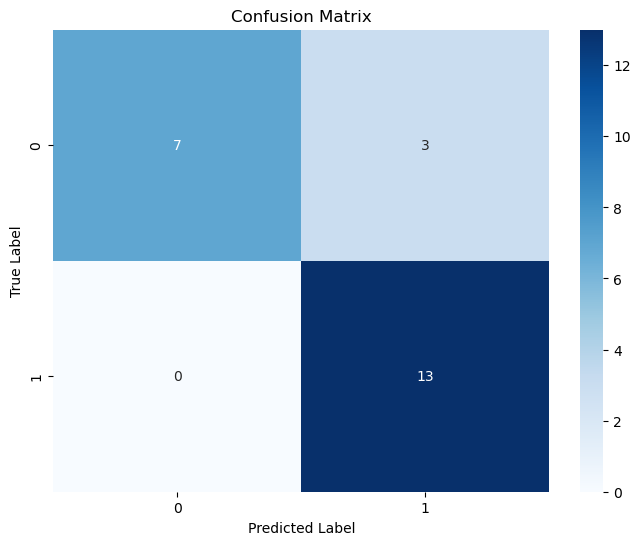

In [42]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [43]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(reg,x,y,cv=5,scoring='accuracy')
score*100

array([86.66666667, 66.66666667, 86.66666667, 86.66666667, 64.28571429])